In [13]:
import pandas as pd
import plotly.express as px

from common.storage import load_cleansed_df
from common.entity import SITEMAP

In [2]:
cleansed_df = load_cleansed_df(SITEMAP, ['ingestion_date', 'job_id'])
cleansed_df.head()

,ingestion_date,job_id
0,2021-10-09,7506917
1,2021-10-09,7506673
2,2021-10-09,7466965
3,2021-10-09,7305531
4,2021-10-09,7384538


In [21]:
df = cleansed_df.copy()
df = df['ingestion_date'].value_counts()
df = df.reset_index()
df.columns = ['Date', 'Jobs']
df = df.sort_values(by='Date')
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Jobs
132,2021-10-09,113858
151,2021-10-10,111325
149,2021-10-11,111745
128,2021-10-12,114141
102,2021-10-13,116319
...,...,...
29,2022-03-14,129285
23,2022-03-15,131363
10,2022-03-16,133802
14,2022-03-17,133619


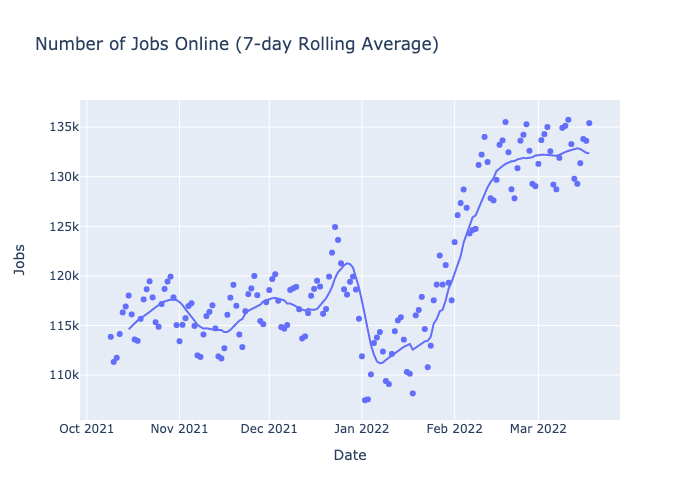

In [26]:
fig = px.scatter(df, x="Date", y="Jobs", trendline="rolling", trendline_options=dict(window=7),
                 title='Number of Jobs Online (7-day Rolling Average)')
fig.show("png")